In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: Compressing Data via Dimensionality Reduction
# @created date: 2019/08/28
# @last modification: 2019/08/29



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_wine = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
df_wine.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=0)

In [9]:
sc = StandardScaler()

In [10]:
X_train_std = sc.fit_transform(X_train)

In [11]:
X_test_std = sc.fit_transform(X_test)

### PCA

In [14]:
# np.cov()函数传进去的矩阵默认行是变量，列是观测值
# 因此需要将X_train_std进行转置
cov_mat = np.cov(X_train_std.T)

In [15]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [16]:
eigen_vals

array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
       0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
       0.16831254, 0.21432212, 0.2399553 ])

variance explained ratio(方差解释率)：  
$$\frac{\lambda _j}{\sum^{d}_{j=1} \lambda_j}$$

In [18]:
tot = np.sum(eigen_vals)
var_exp = [(val / tot) for val in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Text(0,0.5,'Explained variance ratio')

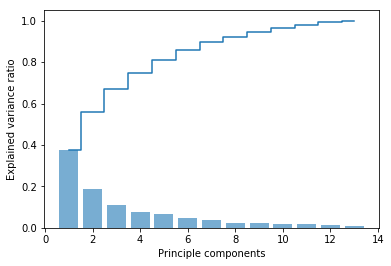

In [20]:
plt.bar(range(1, 14), var_exp, alpha=0.6, align='center', 
        label='individual expained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', 
         label='cumulative explained variance')
plt.xlabel('Principle components')
plt.ylabel('Explained variance ratio')

In [22]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [24]:
eigen_pairs.sort(reverse=True)

In [28]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
             eigen_pairs[1][1][:, np.newaxis]))

In [29]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

transformation to subspace:  
$$x^{\prime} = x W$$

In [32]:
X_train_std[0] @ w

array([2.59891628, 0.00484089])

$$X^{\prime} =  X W$$

In [33]:
X_train_pca = X_train_std @ w

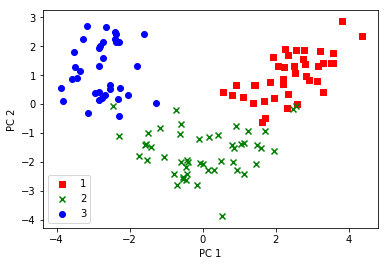

In [38]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for cal, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==cal, 0], X_train_pca[y_train==cal, 1],
               c=c, label=cal, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=None)

In [41]:
X_train_pca = pca.fit_transform(X_train_std)

In [42]:
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

### LDA(Linear Discriminant Analysis)

In [45]:
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label,:], axis=0))

[array([ 0.92586625, -0.30912353,  0.2592266 , -0.79894024,  0.30385444,
         0.96083738,  1.05152135, -0.63058306,  0.53539208,  0.22090961,
         0.48549453,  0.79804628,  1.20171181]),
 array([-0.87273822, -0.38544438, -0.44366976,  0.24807052, -0.24090883,
        -0.10586799,  0.01874319, -0.01640055,  0.10952058, -0.87962307,
         0.43923615,  0.27761267, -0.70155967]),
 array([ 0.16370064,  0.89290617,  0.3248787 ,  0.56577583, -0.00998986,
        -0.94988467, -1.22797915,  0.74362712, -0.76520548,  0.97900417,
        -1.1697815 , -1.30071064, -0.39120139])]

In [56]:
d = 13
S_W1 = np.zeros((d, d))

In [57]:
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = (X_train_std[y_train==label]-mv).T @ (X_train_std[y_train==label]-mv)
    S_W1 += class_scatter
    

In [59]:
d = 13
S_W2 = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, m = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - m) @ (row - m).T
    S_W2 += class_scatter

In [60]:
np.allclose(S_W1, S_W2)

True

In [62]:
print('Class label distribution: {}'.format(np.bincount(y_train)[1:]))

Class label distribution: [40 49 35]


In [108]:
d = 13
S_W3 = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    n = X_train_std[y_train == label].shape[0]
    print(f'samples={n}')
    class_scatter = np.cov((X_train_std[y_train == label] - mv).T) * n
    S_W3 += class_scatter

samples=40
samples=49
samples=35


In [109]:
np.allclose(S_W2, S_W3)

False

The between-class scatter matrix $S_B$:  
$$S_B = \sum \limits^{c}_{i=1} N_i (m_i - m)(m_i - m)^T $$


In [121]:
d = 13
mean_total = np.mean(X_train_std, axis=0)
S_B = np.zeros((d, d))
for i, mv in enumerate(mean_vecs):
    N = X_train_std[y_train==i+1].shape[0]
    #S_B += N * (mv - mean_total) @ (mv - mean_total).T
    mv = mv.reshape(d, 1)
    mean_overall = mean_total.reshape(d, 1)
    S_B += N * (mv - mean_overall) @ (mv - mean_overall).T

the eigenvalue of matrix $S^{-1}_wS_B$:  

In [143]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W1) @ S_B)

In [144]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [146]:
# 由于有很多特征值大小十分相近，此时采用eigen_pairs.sort()无法排序
# 会抛出异常
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [150]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [151]:
X_train_lda = lda.fit_transform(X_train_std, y_train)